In [2]:
import post

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 25, 20], kernel_sizes=[5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=1, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')
Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 28, 25, 25, 30, 20, 15], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/

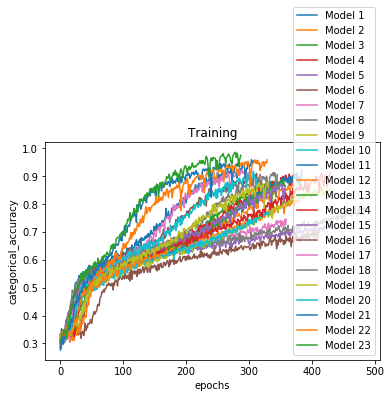

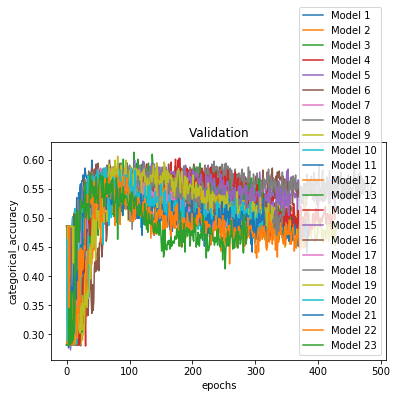

Average Val Accuracy:  0.5831180336682693


In [13]:
post.visualizeExperiment('results', 'rb*.pkl')

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 25, 20], kernel_sizes=[5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=1, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


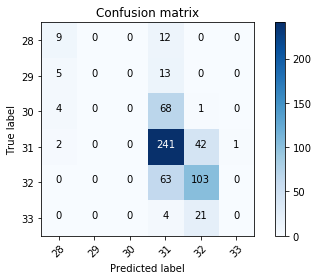

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 28, 25, 25, 30, 20, 15], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=2, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


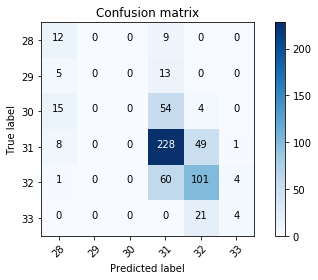

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 25, 20], kernel_sizes=[5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=2, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


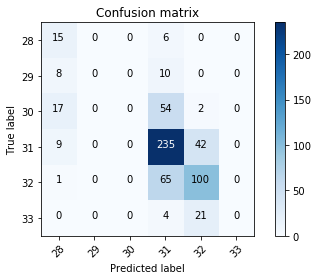

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 25, 20], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=2, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


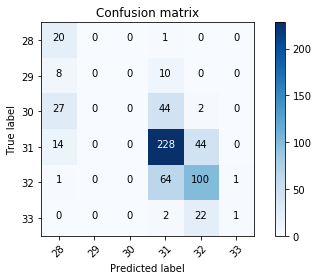

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[15, 10, 10, 15, 12, 12, 20, 15, 15, 25, 20, 15, 15], kernel_sizes=[8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 6, 1, 1, 5, 1, 1, 6, 1, 1, 1], pool_strides=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


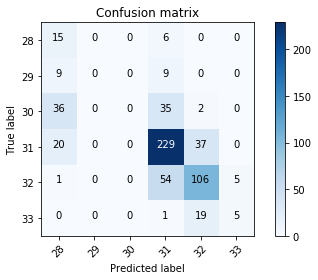

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[15, 10, 10, 15, 12, 12, 20, 15, 15, 25, 20, 15], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 4, 1, 1, 5, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


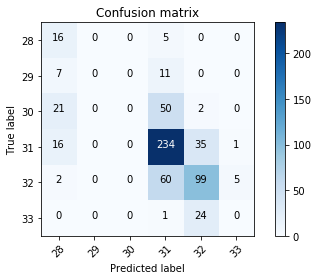

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 20, 15, 15, 25, 20, 20, 25, 15, 15, 15], kernel_sizes=[5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 8, 1, 1, 5, 1, 1, 8, 1, 1, 1], pool_strides=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


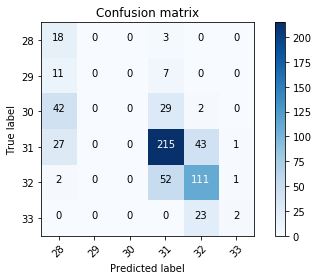

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 20, 15, 15, 25, 20, 20, 30, 20, 15, 15], kernel_sizes=[5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 6, 1, 1, 5, 1, 1, 6, 1, 1, 1], pool_strides=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


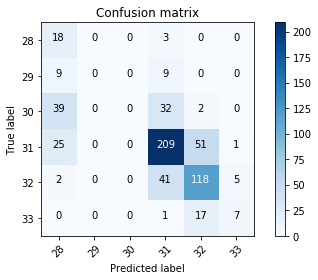

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 28, 25, 25, 30, 20, 15], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


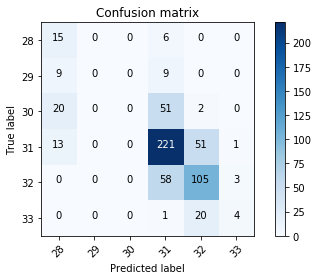

Namespace(batchSize=None, dense=[20, 12, 12], dropout=0.3, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 25, 20], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


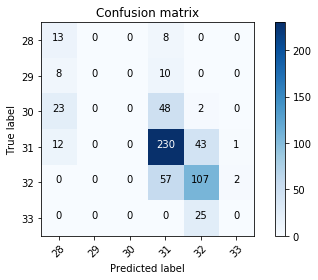

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 25, 20], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


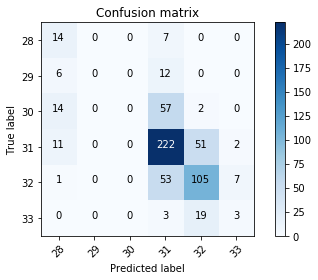

Namespace(batchSize=None, dense=[40, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 35, 35], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


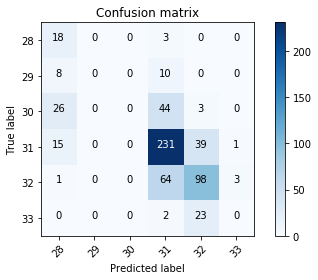

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[20, 15, 15, 25, 20, 20, 30, 25, 25, 35, 35, 35], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


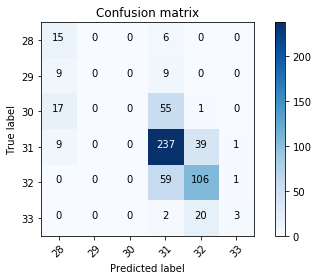

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[25, 15, 15, 25, 20, 20, 30, 25, 25, 40, 25, 15, 15], kernel_sizes=[5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 6, 1, 1, 5, 1, 1, 6, 1, 1, 1], pool_strides=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


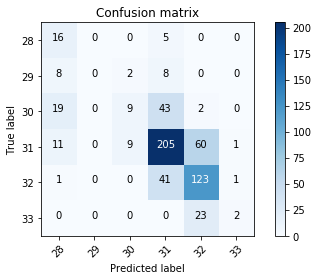

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[25, 15, 15, 25, 20, 20, 30, 25, 25, 40, 25, 15, 15], kernel_sizes=[8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 5, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 6, 1, 1, 5, 1, 1, 6, 1, 1, 1], pool_strides=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


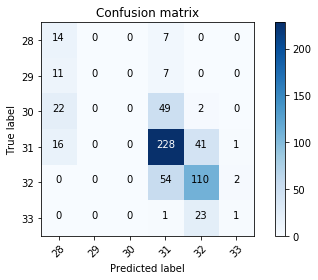

Namespace(batchSize=None, dense=[40, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[25, 20, 20, 30, 25, 25, 35, 30, 30, 45, 40, 40], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


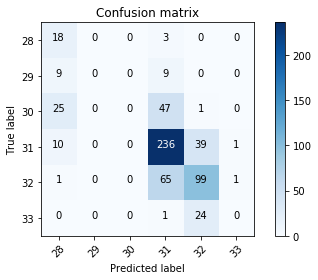

Namespace(batchSize=None, dense=[40, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[25, 20, 20, 30, 25, 25, 35, 35, 35, 50, 50, 50], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


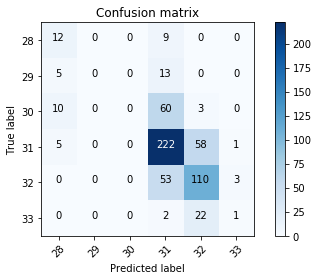

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[30, 20, 20, 30, 25, 25, 40, 30, 30, 45, 20, 20], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 4, 1, 1, 5, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


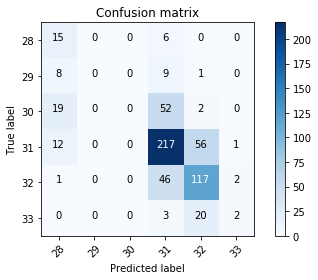

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[30, 20, 20, 30, 25, 25, 40, 30, 30, 45, 20, 20], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


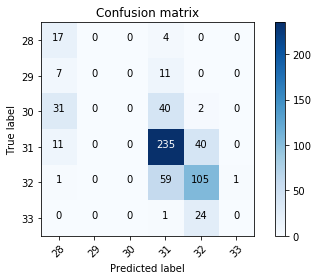

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[30, 25, 25, 35, 30, 30, 40, 35, 35, 50, 30, 15], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


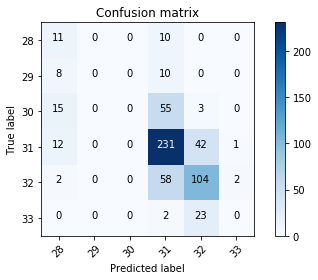

Namespace(batchSize=None, dense=[20, 12, 12], dropout=0.3, epochs=5000, exp='rb', filters=[40, 25, 25, 50, 35, 35, 60, 40, 40, 75, 50, 50], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


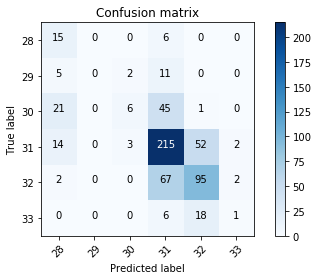

Namespace(batchSize=None, dense=[30, 24, 24], dropout=0.4, epochs=5000, exp='rb', filters=[40, 25, 25, 50, 35, 35, 60, 40, 40, 75, 50, 50], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


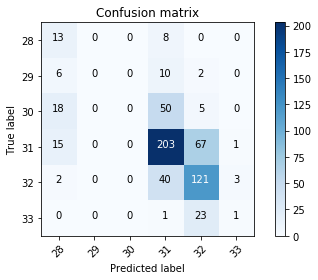

Namespace(batchSize=None, dense=[50, 36, 36], dropout=0.4, epochs=5000, exp='rb', filters=[40, 25, 25, 50, 35, 35, 60, 40, 40, 75, 50, 50], kernel_sizes=[5, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3], kernel_strides=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], l2=0.0001, min_delta=0.0, nclasses=6, patience=250, pklDir='/ourdisk/hpc/symbiotic/auto_archive_notyet/tape_2copies/datasets/group/sippc3/kinematics', pool_sizes=[1, 1, 1, 5, 1, 1, 3, 1, 1, 5, 1, 1], pool_strides=[1, 1, 1, 3, 1, 1, 2, 1, 1, 3, 1, 1], reduce=4, resultsPath='results', stepsPerEpoch=None, trainCSV='MasteryOfPropulsionTrain.csv', trainCSVDir='.', validCSV='MasteryOfPropulsionValid.csv', validCSVDir='.')


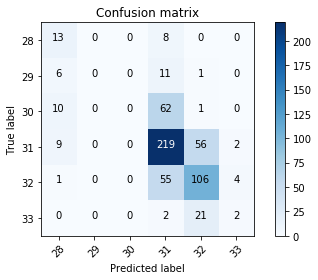

In [12]:
post.visualizeConfusion('results', 'rb*.pkl')